In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
plt.rc('animation', html='jshtml') #something to do with with jupyter notebooks animation

7.2 Simulate

In [58]:
class RandomWalk2D:
    def __init__(self, N, steps, delta_d=1.0):
        """
        Initializes a 2D random walk simulation.
        
        Parameters:
        - N: Number of walkers
        - steps: Number of steps for each walker
        - delta_d: Step size in each direction (default is 1.0)
        """
        self.N = N
        self.steps = steps
        self.delta_d = delta_d
        self.P_start = np.zeros((N, 2))  # Starting points at the origin for each walker
        self.points_in_time = [self.P_start.copy()]  # List to track positions over time
        self.rms_distances = np.zeros(steps)  # Array to store RMS distances for each step

    def perform_walk(self):
        """
        Performs the random walk for the specified number of steps.
        """
        P_start = self.P_start
        
        for step in range(self.steps):
            # Generate random angles and compute DeltaP
            angles = np.random.uniform(0, 2 * np.pi, self.N)
            cos_values = np.cos(angles)
            sin_values = np.sin(angles)
            DeltaP = np.column_stack((cos_values * self.delta_d, sin_values * self.delta_d))
            P_end = P_start + DeltaP

            # Compute RMS distance from origin
            distances = np.sqrt(P_end[:, 0]**2 + P_end[:, 1]**2)
            self.rms_distances[step] = np.sqrt(np.mean(distances**2))

            # Store positions at each step
            self.points_in_time.append(P_end.copy())
            P_start = P_end

        self.P_start = P_start  # Update starting position for next walk

    def plot_paths(self):
        """
        Plots the paths of each walker.
        """
        plt.figure(figsize=(10, 8))
        for walker in range(self.N):
            x_values = [point[walker][0] for point in self.points_in_time]
            y_values = [point[walker][1] for point in self.points_in_time]
            plt.plot(x_values, y_values, marker='o')

        print(x_values)

        plt.title(f"Paths of {self.N} {self.steps}-step walkers from origin")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.grid(True)
        plt.legend()
        plt.show()
    
    def plot_endpoints(self):
        """
        Plots only the endpoints of each walker.
        """
        plt.figure(figsize=(10, 8))
        final_positions = self.points_in_time[-1]
    
        # Plot each walker's endpoint
        for walker in range(self.N):
            x_final = final_positions[walker][0]
            y_final = final_positions[walker][1]
            plt.plot(x_final, y_final, marker='o', label=f"Walker {walker+1}")
        
        plt.title(f"Endpoints of {self.N} {self.steps}-step walkers from origin")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.grid(True)
        plt.show()

    def plot_RMS_vs_time(self):
        """
        plot3: RMS distance vs time
        """

        plt.figure()
        plt.loglog(range(self.steps), self.rms_distances, marker='o')
        plt.title("RMS distance from origin vs time steps")
        plt.xlabel("Time Steps")
        plt.ylabel("RMS Distance")
        plt.grid(True)
        plt.show()



[np.float64(0.0), np.float64(0.18144617270460386)]


/tmp/ipykernel_76950/3038967863.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


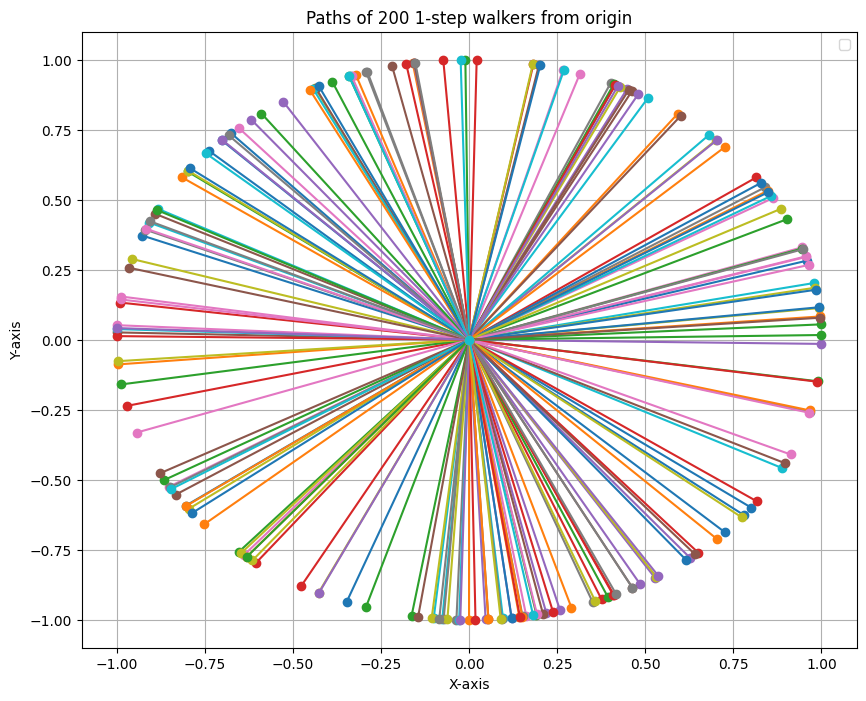

[np.float64(0.0), np.float64(-0.16598756835744036), np.float64(0.446039592248606)]


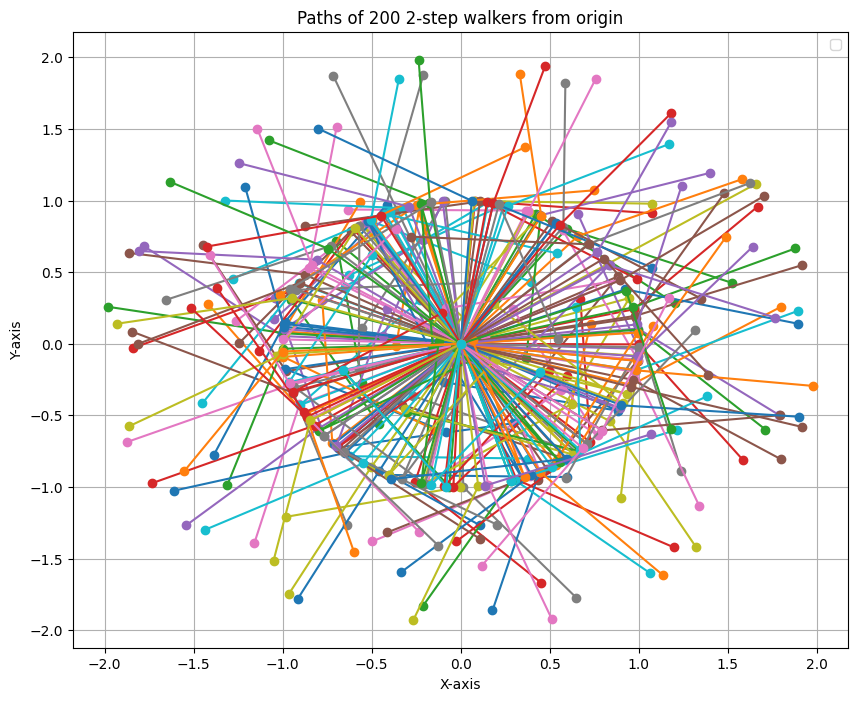

In [46]:
# demonstrate that it behaves as expected
walk_simulation = RandomWalk2D(N=200, steps=1, delta_d=1.0)
walk_simulation.perform_walk()
walk_simulation.plot_paths()

# for 2 steps
walk_simulation = RandomWalk2D(N=200, steps=2, delta_d=1.0)
walk_simulation.perform_walk()
walk_simulation.plot_paths()

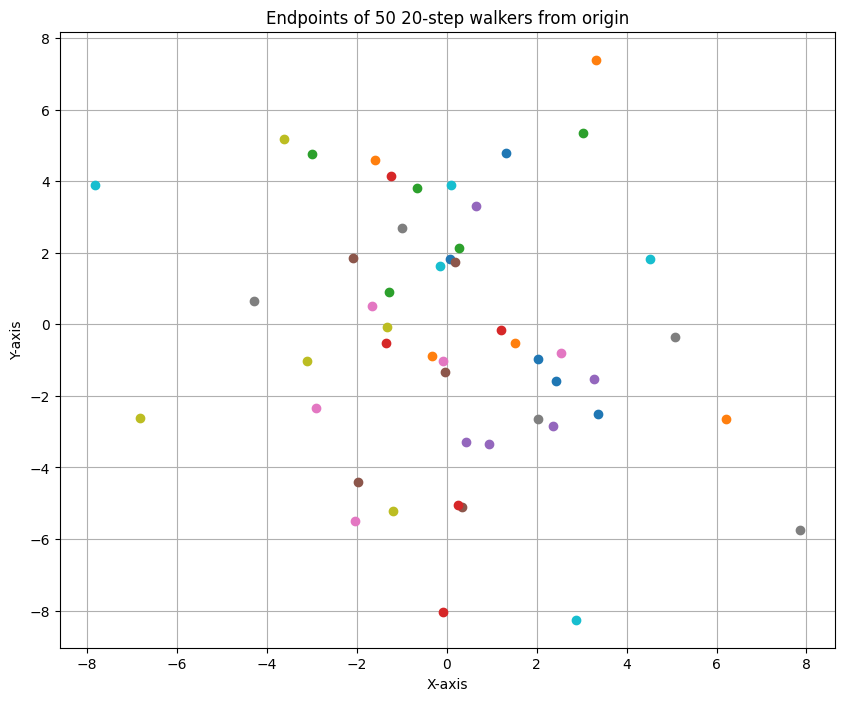

In [55]:
walk_simulation = RandomWalk2D(N=50, steps=20, delta_d=1.0)
walk_simulation.perform_walk()
walk_simulation.plot_endpoints()

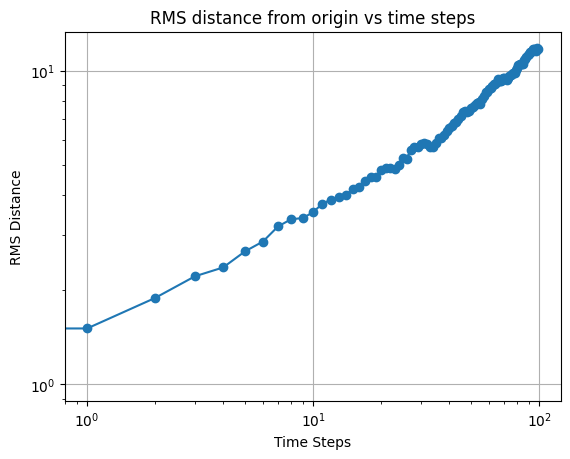

In [59]:
# 7.3 Analyze d) plot in log-log to get a slope of ½ 

walk_simulation = RandomWalk2D(N=50, steps=100, delta_d=1.0)
walk_simulation.perform_walk()
walk_simulation.plot_RMS_vs_time()

In [65]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

def animate_walk(self):
    """Create an animation of the walkers' paths."""
    if not self.points_in_time:
        print("No walking data available. Please call perform_walk() first.")
        return

    fig, ax = plt.subplots()
    flattened_array = np.concatenate(self.points_in_time).ravel()
    min_value = np.min(flattened_array)
    max_value = np.max(flattened_array)

    ax.set_xlim(min_value, max_value)
    ax.set_ylim(min_value, max_value)
    ax.set_title(f"Evolution of {self.N} Random Walkers in {self.steps} steps")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")

    scat = ax.scatter([], [], marker='o')

    def update(frame):
        data = np.array(self.points_in_time[frame])
        scat.set_offsets(data)
        return [scat]

    anim = FuncAnimation(fig, update, frames=range(self.steps + 1), interval=100, blit=True)
    plt.close(fig)  # Prevents displaying the empty figure at the start
    return HTML(anim.to_jshtml())

RandomWalk2D.animate_walk = animate_walk # attaching the function to the class RandomWalk2D

# actually doing the walk animation
walk_simulation = RandomWalk2D(N=50, steps=20, delta_d=1.0)
walk_simulation.perform_walk()
walk_simulation.animate_walk()